In [20]:
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
%matplotlib inline

In [21]:
image = cv2.imread('/content/drive/MyDrive/datasets/Cotton Disease/train/diseased cotton leaf/dis_leaf (101)_iaip.jpg')
plt.figure(figsize=(10,10))
plt.title(' Cotton Leaf with Disease')
plt.imshow(image)

In [22]:
image = cv2.imread('/content/drive/MyDrive/datasets/Cotton Disease/train/diseased cotton plant/dd (104)_iaip.jpg')
plt.figure(figsize=(10,10))
plt.title(' Cotton Plant with Disease')
plt.imshow(image)

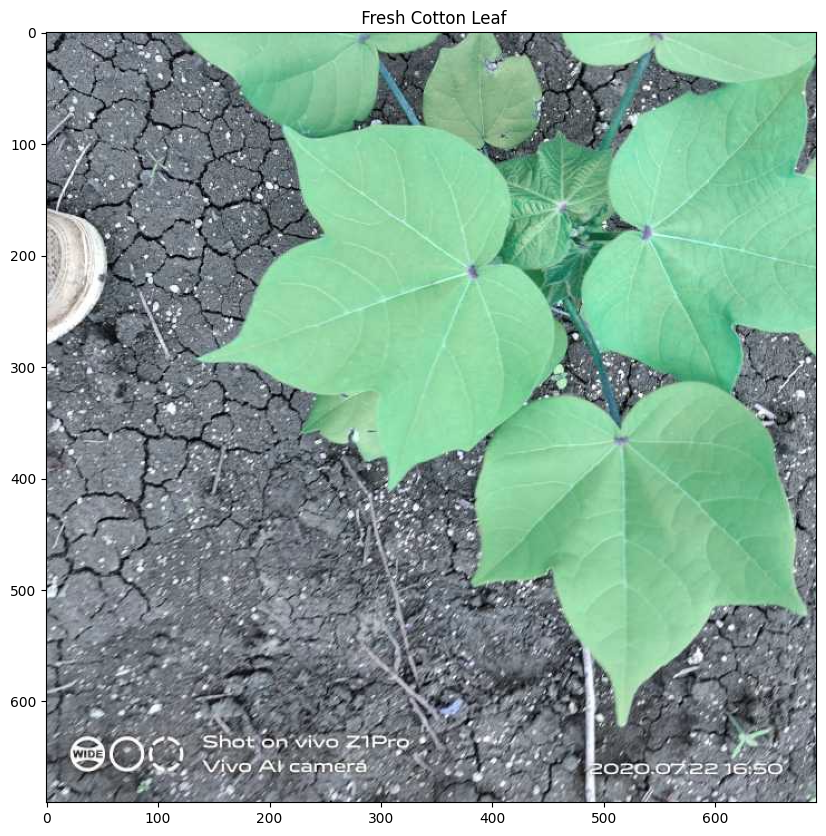

In [23]:
image = cv2.imread('/content/drive/MyDrive/datasets/Cotton Disease/train/fresh cotton leaf/d (100)_iaip.jpg')
type(image)
plt.figure(figsize=(10,10))
plt.title(' Fresh Cotton Leaf')
plt.imshow(image)


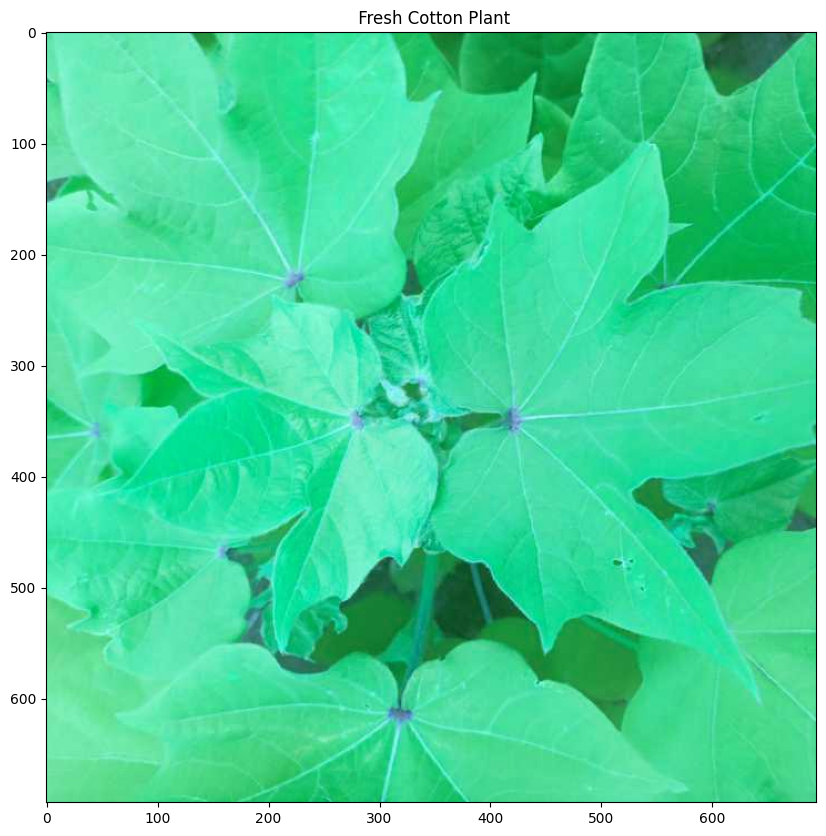

In [24]:
image = cv2.imread('/content/drive/MyDrive/datasets/Cotton Disease/train/fresh cotton plant/dsd (143)_iaip.jpg')
plt.figure(figsize=(10,10))
plt.title(' Fresh Cotton Plant')
plt.imshow(image)

In [25]:
train_datagenerator = ImageDataGenerator(rescale = 1.0/255,
                                        shear_range = 0.2,
                                        zoom_range = 0.5,
                                        horizontal_flip = True,
                                        rotation_range=10,
                                        width_shift_range=0.2,
                                        brightness_range=[0.2,1.2]
                                        )
test_datagenerator = ImageDataGenerator(rescale = 1.0/255)

In [26]:
train_data = train_datagenerator.flow_from_directory('/content/drive/MyDrive/datasets/Cotton Disease/train',
                                                    target_size = (256,256),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')
test_data = test_datagenerator.flow_from_directory('/content/drive/MyDrive/datasets/Cotton Disease/val',
                                                  target_size = (256,256),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.


In [27]:
#Building Model
cnn = tf.keras.models.Sequential()
# Convolution
cnn.add(tf.keras.layers.Conv2D(filters=64,padding = "same",kernel_size=3,activation='relu',input_shape=[256,256,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding = "same",kernel_size=3,activation='relu'))
# pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# Convolution
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#flaterning
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
# Output layer
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

In [28]:
# Compiling the CNN
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
history = cnn.fit(x = train_data, validation_data = test_data, epochs = 10)

Epoch 1/10
61/61 [==============================] - 645s 10s/step - loss: 1.1743 - accuracy: 0.5069 - val_loss: 1.1533 - val_accuracy: 0.4348
Epoch 2/10
61/61 [==============================] - 50s 811ms/step - loss: 1.0695 - accuracy: 0.5602 - val_loss: 1.1174 - val_accuracy: 0.5652
Epoch 3/10
61/61 [==============================] - 49s 802ms/step - loss: 0.9896 - accuracy: 0.5884 - val_loss: 0.9265 - val_accuracy: 0.5731
Epoch 4/10
61/61 [==============================] - 49s 796ms/step - loss: 0.9265 - accuracy: 0.6361 - val_loss: 0.8560 - val_accuracy: 0.6443
Epoch 5/10
61/61 [==============================] - 49s 807ms/step - loss: 0.8430 - accuracy: 0.6474 - val_loss: 0.6947 - val_accuracy: 0.7233
Epoch 6/10
61/61 [==============================] - 49s 793ms/step - loss: 0.7529 - accuracy: 0.6981 - val_loss: 0.5377 - val_accuracy: 0.8103
Epoch 7/10
61/61 [==============================] - 49s 794ms/step - loss: 0.6984 - accuracy: 0.7304 - val_loss: 0.9605 - val_accuracy: 0.6166


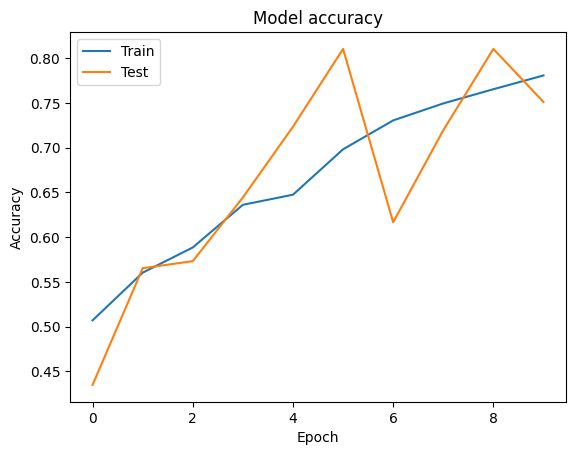

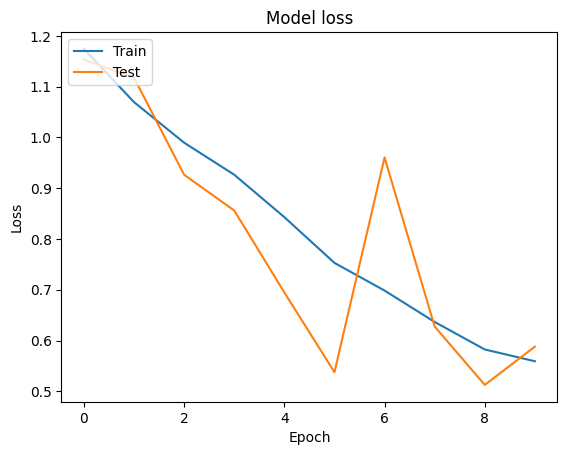

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [30]:
from keras.applications.vgg16 import VGG16

# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
IMAGE_SIZE = [224, 224]
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [31]:
for layer in vgg16.layers:
    layer.trainable = False

In [32]:
folders = glob('/content/drive/MyDrive/datasets/Cotton Disease/train/*')
folders

['/content/drive/MyDrive/datasets/Cotton Disease/train/fresh cotton plant',
 '/content/drive/MyDrive/datasets/Cotton Disease/train/fresh cotton leaf',
 '/content/drive/MyDrive/datasets/Cotton Disease/train/diseased cotton plant',
 '/content/drive/MyDrive/datasets/Cotton Disease/train/diseased cotton leaf']

In [33]:
x = Flatten()(vgg16.output)

In [34]:
len(folders)

4

In [35]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [36]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [37]:
# the model what cost and optimization method to use
model.compile( loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [38]:
# Image Data Generator to import the images from the dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [39]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/datasets/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [40]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/datasets/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [41]:
# Fit the model
r = model.fit_generator( training_set,
                         validation_data=test_set,
                        epochs=20,
                        steps_per_epoch=len(training_set),
                         validation_steps=len(test_set))

<ipython-input-41-7101ccf945b5>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator( training_set,


Epoch 1/20
61/61 [==============================] - 92s 1s/step - loss: 0.7113 - accuracy: 0.7576 - val_loss: 0.2252 - val_accuracy: 0.9434
Epoch 2/20
61/61 [==============================] - 37s 603ms/step - loss: 0.2454 - accuracy: 0.9149 - val_loss: 0.1783 - val_accuracy: 0.9434
Epoch 3/20
61/61 [==============================] - 37s 604ms/step - loss: 0.1744 - accuracy: 0.9354 - val_loss: 0.1489 - val_accuracy: 0.9434
Epoch 4/20
61/61 [==============================] - 38s 624ms/step - loss: 0.1327 - accuracy: 0.9575 - val_loss: 0.1888 - val_accuracy: 0.8962
Epoch 5/20
61/61 [==============================] - 36s 590ms/step - loss: 0.1139 - accuracy: 0.9641 - val_loss: 0.1138 - val_accuracy: 0.9528
Epoch 6/20
61/61 [==============================] - 36s 591ms/step - loss: 0.0950 - accuracy: 0.9728 - val_loss: 0.1245 - val_accuracy: 0.9528
Epoch 7/20
61/61 [==============================] - 38s 616ms/step - loss: 0.0721 - accuracy: 0.9810 - val_loss: 0.1167 - val_accuracy: 0.9434
Ep

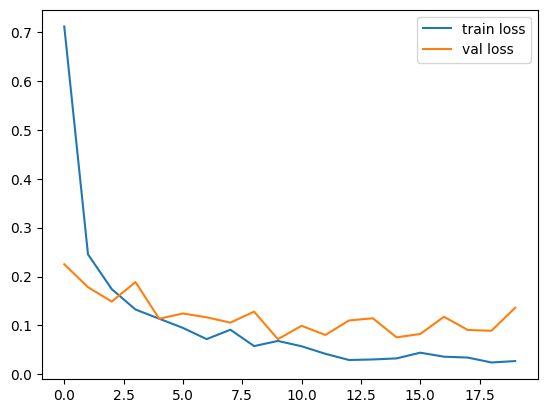

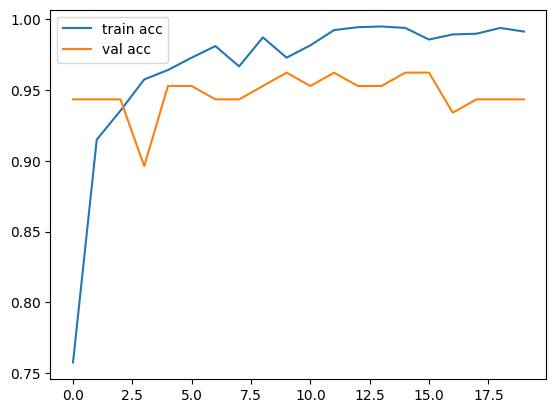

In [42]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


1/1 [==============================] - 0s 19ms/step


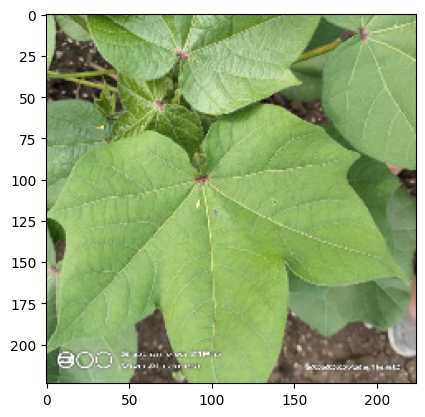

In [57]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/datasets/d (133)_iaip.jpg', target_size = (224, 224))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
preds = model.predict(test_image)

In [58]:
preds

array([[4.4700394e-07, 9.7576447e-11, 9.9999952e-01, 4.4938164e-11]],
      dtype=float32)

In [59]:
preds = np.argmax(preds, axis=1)

In [60]:
if preds == 0:
    print("\033[91mThe leaf is diseased cotton leaf\033[0m")  # \033[91m for red, \033[0m to reset color
elif preds == 1:
    print("\033[91mThe leaf is diseased cotton plant\033[0m")
elif preds == 2:
    print("\033[92mThe leaf is fresh cotton leaf\033[0m")  # \033[92m for green
else:
    print("\033[92mThe leaf is fresh cotton plant\033[0m")


The leaf is fresh cotton leaf


1/1 [==============================] - 0s 26ms/step


array([[9.7839874e-01, 6.4580092e-08, 2.1594489e-02, 6.5947902e-06]],
      dtype=float32)

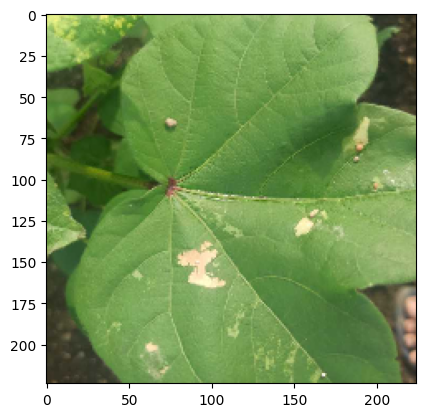

In [61]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/datasets/dis_leaf.jpg', target_size = (224, 224))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
preds = model.predict(test_image)
preds

In [62]:
preds = np.argmax(preds, axis=1)

In [63]:
if preds == 0:
    print("\033[91mThe leaf is diseased cotton leaf\033[0m")  # \033[91m for red, \033[0m to reset color
elif preds == 1:
    print("\033[91mThe leaf is diseased cotton plant\033[0m")
elif preds == 2:
    print("\033[92mThe leaf is fresh cotton leaf\033[0m")  # \033[92m for green
else:
    print("\033[92mThe leaf is fresh cotton plant\033[0m")


The leaf is diseased cotton leaf
